# <center>  Assignment 1 - Exploring Toronto Bike Share </center>
### <center> JSC270, Winter 2020 </center>
### <center> Howard Chen </center>

<br/> <br/>

***

##  I. Introduction

Bike Share Toronto is the bicycle sharing transit system located throughout downtown Toronto, providing access to 5000 bikes at 468 stations. It is aunched in 2011 by Public Bike System Company under the BIXI brand, and the system was taken over by the Toronto Parking Authority (TPA) in 2014. Over the past few years, Bike Share has become an increasingly attractive way as transportation in Toronto. In 2018, TPA saw an [81% ridership increase](https://www.toronto.ca/legdocs/mmis/2018/pa/bgrd/backgroundfile-121986.pdf). We the increasing demand in the system, we are interested in how usage of the system in Toronto.

The purpose of this research is to investigate how Torontonians are using Bike Share. Specifically, we are interested in how casual users and members uses bike share, and whether season or weather has an effect on how people uses the system. 

We will be investigating the behaviour of Toronto bike share users with the support of 2016 third quarter, 2019 fourth quarter, and 2017 Toronto ridership data, information regarding the location of each stations, as well as historical weather data of Toronto. 

Research questions we are investigating in this report are: 
1. Defining trip length in two ways: the duration of each trip in seconds and the distance traveled. Is there a relationship between the two definition?
2. Do casual users take shorter trips compared to members? 
3. Does weather affect trip length?

<br/> <br/>

***

##  II. Method

##### Vincenty's Formulae
The formulae is used for calculating geodesic distances between a pair of latitude/longitude points on the surface of a spheroid. It is used on the assumption that Earth is an ellipsoid.

##### The Interquartile Range Rule
Any set of data can be described by its five-number summary. The five numbers consist of: 
- The minimum of the dataset
- The first quartile Q1 (25th percentile)
- The median of the data set (the 50th percentile)
- The third quartile Q3 (the 75th percentile)
- The maximum of the data set

The interquartile range is calculated in:

\begin{equation}
IQR = Q3 - Q1
\end{equation}

We consider data points that are 1.5 x (IQR) above the third quartile and 1.5 x (IQR) below the first quartile as ouliers.

##### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables in the dataframe. Each random variable ($X_{i}$) in the table is correlated with each of the other values in the table ($X_j$). This allows us to determine which pairs have the highest correlation.

\begin{equation}
r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}
\end{equation}

where $s_x$ and $s_y$ are the sample standard deviations, and $s_xy$ is the sample covariance

<br/> <br/>

***

##  III. Data Sets and Processing

The datasets I am using for this research are:
1. The 2016 Q3, 2016 Q4, and 2017 Toronto Bikeshare ridership data available at https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/.
2. Station information, which we will be using this dataset to obtain the location of each station, is available at https://open.toronto.ca/dataset/bike-share-toronto/.
3. Historical weather data of Toronto, which we are going to scrape the data from a Government of Canada [website](https://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year=2017&Month=1#).

##### Toronto Bikeshare ridership data
We will investigate and clean the Toronto Bikeshare ridership data first. 

In [1]:
import pandas as pd
df_2017q1 = pd.read_csv("data/Bikeshare Ridership (2017 Q1).csv")
df_2017q2 = pd.read_csv("data/Bikeshare Ridership (2017 Q2).csv")
df_2017q3 = pd.read_csv("data/Bikeshare Ridership (2017 Q3).csv")
df_2017q4 = pd.read_csv("data/Bikeshare Ridership (2017 Q4).csv")
df_2016q3 = pd.read_excel("data/bikeshare-ridership-2016-q3.xlsx")
df_2016q4 = pd.read_excel("data/bikeshare-ridership-2016-q4.xlsx")

An inital review of the 2017 Q1 and 2017 Q3 data:

In [2]:
df_2017q1.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member


In [3]:
df_2017q3.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1253914,7/1/2017 0:00,7/1/2017 0:15,910,Princess St / Adelaide St E,424 Wellington St W,Member
1,1253915,7/1/2017 0:01,7/1/2017 0:15,837,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
2,1253916,7/1/2017 0:01,7/1/2017 0:14,786,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
3,1253917,7/1/2017 0:01,7/1/2017 0:25,1420,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual
4,1253918,7/1/2017 0:01,7/1/2017 0:25,1437,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual


In [4]:
df_2017q3[df_2017q3['trip_start_time'] == df_2017q3['trip_stop_time']].head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
146,1254062,7/1/2017 2:39,7/1/2017 2:39,21,Queens Park / Bloor St W,Queens Park / Bloor St W,Casual
165,1254081,7/1/2017 3:41,7/1/2017 3:41,21,Bathurst St / Dundas St W,Bathurst St / Dundas St W,Member
182,1254098,7/1/2017 5:03,7/1/2017 5:03,21,York St / Queens Quay W,York St / Queens Quay W,Member
381,1254298,7/1/2017 9:45,7/1/2017 9:45,26,Bay St / Albert St,Bay St / Albert St,Casual
523,1254448,7/1/2017 10:37,7/1/2017 10:37,49,Church St / Wood St,Church St / Wood St,Member


We can see that each record within the data represents a unique trip. However, by comparing the two dataframe, we have observed some issues:
1. Datatime format varies between files, some dataframe provide datetime accurate to seconds
2. Not all the dataframe contain station IDs
3. Station names are inconsistent
4. Trips with same start and end stations with abnornally low trip duration

There is another important issue with the data I would like to address. I will show the issue with the graphs below. 

In [5]:
import matplotlib.pyplot as plt
def distribution_by_hour(df, title):
    """
    Plot data binned by hour.

    x-axis is the hour, y-axis is the number of datapoints.

    Parameters
    ----------
    df : Pandas.Dataframe object
    """
    y = df.groupby(pd.to_datetime(df["trip_start_time"]).dt.hour).count()
    y["trip_start_time"].plot(kind="bar")
    plt.title(title)
    plt.show()

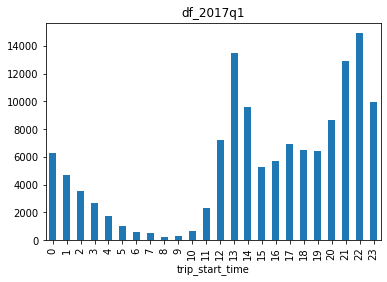

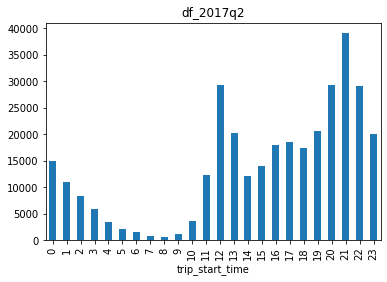

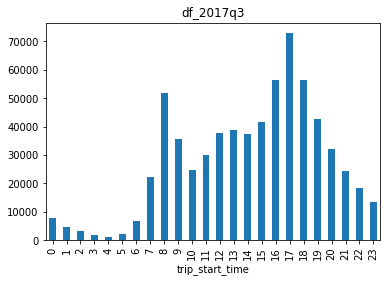

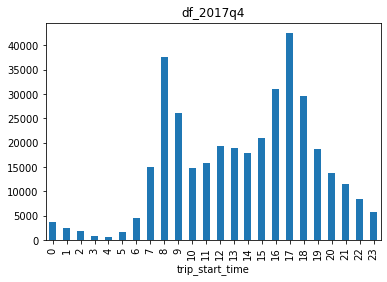

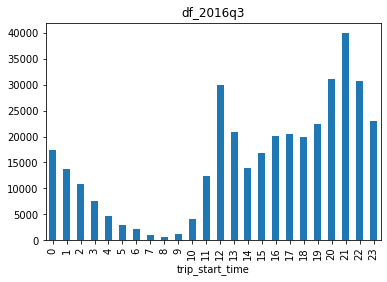

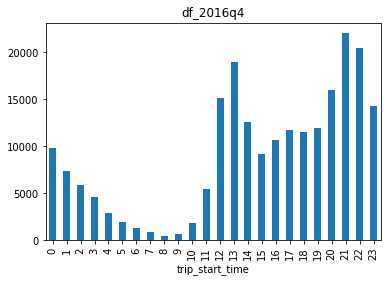

In [6]:
dict_period_df = {"df_2017q1": df_2017q1, "df_2017q2": df_2017q2, "df_2017q3": df_2017q3,
                 "df_2017q4": df_2017q4, "df_2016q3": df_2016q3, "df_2016q4": df_2016q4}
for name, df in dict_period_df.items():
    distribution_by_hour(df, name)

Noticed that 2017 Q3, Q4 have a very similar distribution, while the others have a similar distribution. This suggest that not all the data are recorded in the same timezone. We can see in the bar plot that Q1 and Q2 are 4 hours ahead of the others. We will clean the data according to all the issues mentioned above. 

##### Station Information Data
Next, we will load the station information data from the Bike Share API endpoint.

In [7]:
import requests
import json
import os

r = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

bikeshare_stations_df = pd.DataFrame(json.loads(r.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon']].astype({
    'station_id': 'float64',
})

bikeshare_stations_df

,station_id,name,lat,lon
0,7000.0,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001.0,Lower Jarvis St / The Esplanade,43.647992,-79.370907
2,7002.0,St. George St / Bloor St W,43.667333,-79.399429
3,7003.0,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004.0,University Ave / Elm St,43.656518,-79.389099
...,...,...,...,...
458,7505.0,Ontario St / Adelaide St E -SMART,43.652458,-79.366433
459,7506.0,Berkeley St / Adelaide St E - SMART,43.653359,-79.365023
460,7508.0,Berkeley St / Dundas St E - SMART,43.658816,-79.367318
461,7509.0,Ontario St / King St E,43.651814,-79.366194


Some of the research questions we want to investigate:
1. Defining trip length in two way: trip duration (by seconds) and trip distance (by meters). Is there a relationship between the two definitions of trip length?
2. Do casual users take shorter trips compared to members?

Noticed that we can determine each trip's distance by calculating the distance between its starting location and ending location, which is provided by the latitude and longitude. We can also obtain the duration of each trip through the column "trip_duration_seconds" in each quarter. 

##### Data Cleaning and Joining Bikeshare Ridership data and Station Information Data

The objective is to join the data from the two sources into a single DataFrame, containing standardized dates (solving different data format issue, and different timezone issue) and station information (inconsistent station name).

In [8]:
from datetime import timedelta
list_period_df = [[df_2017q1, ['%d/%m/%Y %H:%M', -4]], [df_2017q2, ['%d/%m/%Y %H:%M', -4]], 
                 [df_2017q3, ['%d/%m/%Y %H:%M', 0]], [df_2017q4, ['%d/%m/%Y %H:%M', 0]], 
                 [df_2016q3, ['%d/%m/%Y %H:%M', -4]], [df_2016q4, ['%d/%m/%Y %H:%M', -4]]]

df = pd.DataFrame() # Initiate an empty DataFrame

for sublist in list_period_df:
    tmp = sublist[0]
    
    # Read the datetime in the specified format
    tmp['trip_start_time'] = pd.to_datetime(tmp['trip_start_time'], format=sublist[1][0], errors='coerce')
    # Convert the input time to the Easter timezone
    tmp['trip_start_time'] = tmp['trip_start_time'] + timedelta(hours=sublist[1][1])

updated_time_df = [df_2017q1, df_2017q2, df_2017q3, df_2017q4, df_2016q3, df_2016q4]
    
df = pd.concat(objs = updated_time_df, sort=False, join = "outer").reset_index(drop=True)

In [9]:
stations_start = df[['from_station_id', 'from_station_name']]
stations_end = df[['to_station_id', 'to_station_name']]
stations_start.columns = stations_end.columns = ['station_id', 'name']

# Extracts the unique station ID and name combination from the from_station and to_station columns
stations = pd.concat([stations_start, stations_end]).dropna(how='all').drop_duplicates().reset_index(drop=True)

In [10]:
from fuzzywuzzy import fuzz
# Separate the stations without station IDs
no_ids = stations[stations['station_id'].isnull()]
for idx, miss in no_ids.iterrows():
    max_score = 0
    
    # Compare the similarity of the station without ID to each station in the API data
    for i, exist in bikeshare_stations_df[['station_id', 'name']].iterrows():
        score = fuzz.ratio(miss['name'], exist['name'])
        
        if score > 80 and score > max_score:
            max_score = score
            no_ids.at[idx, 'station_id'] = exist['station_id']
    
    # Warn if the station was not able to be matched
    if max_score <= 80:
        print('WARN: {0} station could not be matched to an existing station'.format(miss['name']))
        
# Remove all stations that were not matched
no_ids = no_ids.dropna()

/Users/cdcvic/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


WARN: Michael Sweet Ave / St. Patrick St station could not be matched to an existing station
WARN: Bremner Blvd / Spadina Ave station could not be matched to an existing station
WARN: Ontario Place Blvd / Remembrance Dr station could not be matched to an existing station
WARN: Bay St / Bloor St W station could not be matched to an existing station
WARN: Bloor St / Brunswick Ave station could not be matched to an existing station
WARN: Bathurst St / Queens Quay W station could not be matched to an existing station
WARN: Dockside Dr / Queens Quay E (Sugar Beach) station could not be matched to an existing station
WARN: Margueretta St / College St station could not be matched to an existing station
WARN: Lansdowne Subway Green P station could not be matched to an existing station
WARN: Victoria St / Gould St (Ryerson University) station could not be matched to an existing station
WARN: Woodbine Subway Green P (Cedarvale Ave) station could not be matched to an existing station
WARN: Stephe

In [11]:
stations = pd.concat([stations[~stations['station_id'].isnull()], no_ids])\
             .merge(bikeshare_stations_df[['station_id', 'lat', 'lon']], how='inner', on='station_id')\
             .drop_duplicates()
             
df = df.merge(stations, how='inner', left_on='from_station_name', right_on='name') \
       .merge(stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_from', '_to']) \
       .drop_duplicates()

df = df[[x for x in df.columns if not x.endswith('_station_id') and not x.endswith('_station_name') and x != 'trip_stop_time']]
df = df[df['trip_start_time'].notnull()] 
df

,trip_id,trip_start_time,trip_duration_seconds,user_type,station_id_from,name_from,lat_from,lon_from,station_id_to,name_to,lat_to,lon_to
0,712382,2016-12-31 20:00:00,223,Member,7051.0,Wellesley St E / Yonge St Green P,43.665060,-79.383570,7089.0,Church St / Wood St,43.662712,-79.379903
1,719668,2017-01-06 20:32:00,162,Member,7051.0,Wellesley St E / Yonge St Green P,43.665060,-79.383570,7089.0,Church St / Wood St,43.662712,-79.379903
2,720949,2017-01-08 20:52:00,194,Member,7051.0,Wellesley St E / Yonge St Green P,43.665060,-79.383570,7089.0,Church St / Wood St,43.662712,-79.379903
3,722433,2017-01-09 20:28:00,159,Member,7051.0,Wellesley St E / Yonge St Green P,43.665060,-79.383570,7089.0,Church St / Wood St,43.662712,-79.379903
4,740570,2017-01-20 12:53:00,222,Member,7051.0,Wellesley St E / Yonge St Green P,43.665060,-79.383570,7089.0,Church St / Wood St,43.662712,-79.379903
...,...,...,...,...,...,...,...,...,...,...,...,...
2088617,1817111,2017-12-09 19:00:00,698,Member,7247.0,Howard Park Ave / Dundas St W - SMART,43.652100,-79.448600,7225.0,Lake Shore Blvd W / Windermere Ave,43.634896,-79.467763
2088627,1770356,2017-06-09 19:23:00,1767,Member,7245.0,Tecumseth St / Queen St W - SMART,43.646552,-79.406468,7225.0,Lake Shore Blvd W / Windermere Ave,43.634896,-79.467763
2088628,1771050,2017-06-09 21:12:00,1272,Member,7245.0,Tecumseth St / Queen St W - SMART,43.646552,-79.406468,7225.0,Lake Shore Blvd W / Windermere Ave,43.634896,-79.467763
2088631,1787058,2017-08-09 23:18:00,719,Member,7223.0,Parkside Dr / Bloor St W - SMART,43.654501,-79.460053,7225.0,Lake Shore Blvd W / Windermere Ave,43.634896,-79.467763


##### Outliers for trip duration
Lets visualize the distribution of trip duration first. 

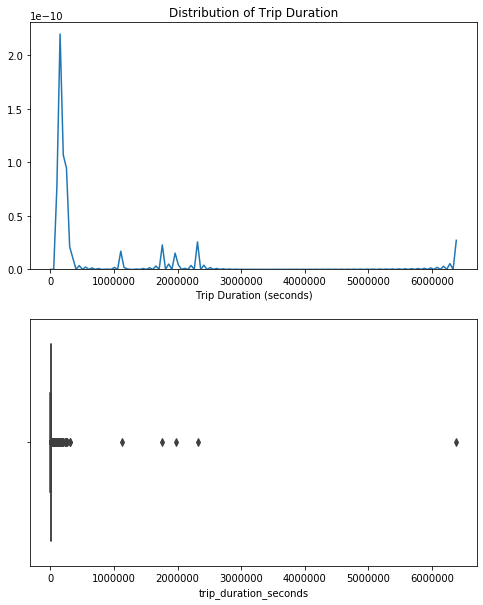

In [12]:
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
sns.distplot(df['trip_duration_seconds'], hist=False, ax=ax[0])
ax[0].set(title='Distribution of Trip Duration', xlabel='Trip Duration (seconds)')
sns.boxplot(x = df['trip_duration_seconds'], ax=ax[1])
plt.show()

The distplot indicates that the trip duration ranging from 1 to 6 million seconds. The boxplot's IQR range indicates that the majority of trip duration is less than thoousands. It is very unreasonable that a person who ride the bike for multiple days, suggesting outliers in the data. Considering Bike Share's princing model, additional cost will be applied if the trip is longer than 30 minutes, hence we can expect that the majority of the trip to be less than 30 minutes. Moreover, TPA consider trip less than a minute to be invalid trips in their own analysis. We will remove trips that are less than a minute. We will also remove trips that are 1.5IQR away from the medium. 

In [13]:
# Toronto Parking Authority generally considers trips less than a minute to be invalid trips.
df = df[df['trip_duration_seconds']>=60]

# Removing outliers
q1 = df['trip_duration_seconds'].quantile(0.25)
q3 = df['trip_duration_seconds'].quantile(0.75)

interquartile_range = q3 - q1

df = df[~((df['trip_duration_seconds'] > (q3 + 1.5 * interquartile_range)))].reset_index(drop=True)
df['trip_duration_seconds'].describe()

count    1.137367e+06
mean     7.223066e+02
std      3.910190e+02
min      6.000000e+01
25%      4.220000e+02
50%      6.430000e+02
75%      9.550000e+02
max      1.943000e+03
Name: trip_duration_seconds, dtype: float64

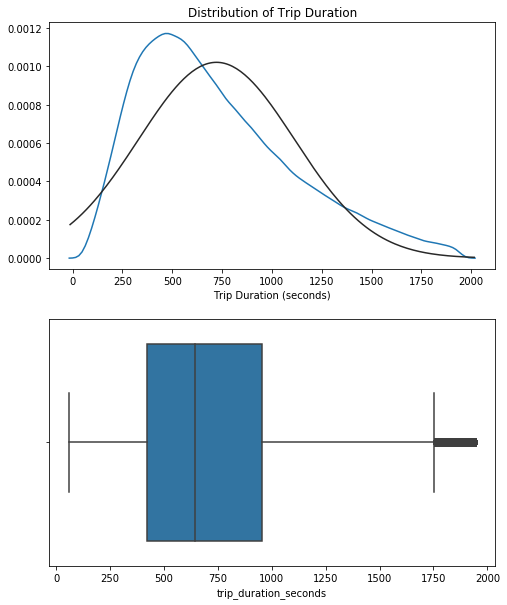

In [14]:
import seaborn as sns
from scipy.stats import norm
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
sns.distplot(df['trip_duration_seconds'], fit = norm, hist=False, ax=ax[0])
ax[0].set(title='Distribution of Trip Duration', xlabel='Trip Duration (seconds)')
sns.boxplot(x = df['trip_duration_seconds'], ax=ax[1])
plt.show()

After removing the outliers, the maximum trip duration is down to 1942 seconds (approximately 32 minutes), which is consistent with the Bike's Share pricing model. The distplot indicates that the distribution of trip duration is right skewed (by comparing it with the normal distribution), and IQR range suggesting that the majority of cyclist uses the system for short trips. 

We have defined trip length in two ways: duration and distance. We have cleaned the data for trip duration. Next, I would like to obtain the trip length for each trips. 

Since we know the latitude and longitude of where the trips start and end, we are calculating the distance of each trips by using the Vincenty's formulae. It is used to calculate the distance between two points on the surface of a spheroid and is based the assumption that the figure of the Earth is an oblate spheroid. 

In [15]:
# Clean up column names for ease of use
df.columns = [' '.join(x.replace('trip_', '').replace('_seconds', ' (Seconds)').split('_')).title() for x in df.columns]
df['Start Time'] = pd.to_datetime(df['Start Time'])

In [16]:
import datetime as dt
import re
from pandas.api.types import CategoricalDtype
# Create the day of week Category by iterrating over 7 days (March 4th, 2019 is a Monday)
days = [(dt.datetime(2019, 3, 4) + dt.timedelta(days=x)).strftime('%a') for x in range(0, 7)]
day_type = CategoricalDtype(categories=days, ordered=True)

# Create the month Category by iterrating over the months
months = [dt.datetime(2019, x, 1).strftime('%B') for x in range(1, 13)]
month_type = CategoricalDtype(categories=months, ordered=True)

In [17]:
df['Date'] = df['Start Time'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['Quarter'] = df['Start Time'].apply(lambda x: int((int(x.strftime('%m')) - 1) / 3) + 1)
df['Month'] = df['Start Time'].apply(lambda x: x.strftime('%B')).astype(month_type)
df['Day of Week'] = df['Start Time'].apply(lambda x: x.strftime('%a')).astype(day_type)
df['Hour'] = df['Start Time'].apply(lambda x: x.strftime('%H'))

In [18]:
# Create a "Route ID" in the "[start station ID]-[end station ID]" format
df['Route Id'] = df.apply(lambda x: '{0}-{1}'.format(int(x['Station Id From']), int(x['Station Id To'])), axis=1)

#Vincenty distance uses more accurate ellipsoidal models such as WGS-84, and is implemented in geopy'
import geopy.distance
# Extract the unique routes from the data with their start and end coordinates
maps = df[['Route Id', 'Station Id From', 'Lat From', 'Lon From', 'Station Id To', 'Lat To', 'Lon To']].drop_duplicates()
maps['Distance'] = maps.apply(lambda x: geopy.distance.vincenty((x['Lat From'], x['Lon From']), 
                                                                (x['Lat To'], x['Lon To'])).km * 1000, axis=1)

# Merge the distance calculation with the main DataFrame
df = df.merge(maps[['Route Id', 'Distance']], how='left', on='Route Id')
df = df[[x for x in df.columns if not 'From' in x and not 'To' in x and x != 'Route Id']]
df.head()

/Users/cdcvic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  if __name__ == '__main__':


,Id,Start Time,Duration (Seconds),User Type,Date,Quarter,Month,Day of Week,Hour,Distance
0,712382,2016-12-31 20:00:00,223,Member,2016-12-31,4,December,Sat,20,394.38189
1,719668,2017-01-06 20:32:00,162,Member,2017-01-06,1,January,Fri,20,394.38189
2,720949,2017-01-08 20:52:00,194,Member,2017-01-08,1,January,Sun,20,394.38189
3,722433,2017-01-09 20:28:00,159,Member,2017-01-09,1,January,Mon,20,394.38189
4,740570,2017-01-20 12:53:00,222,Member,2017-01-20,1,January,Fri,12,394.38189


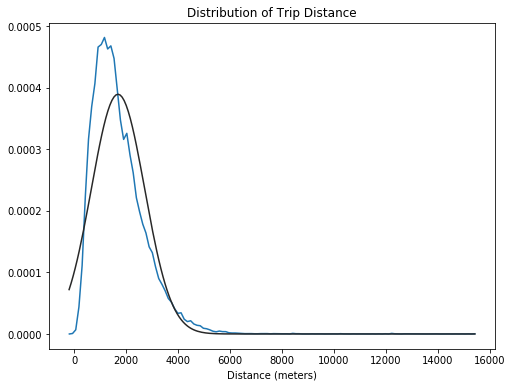

In [19]:
import seaborn as sns
from scipy.stats import norm
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.distplot(df['Distance'], fit = norm, hist=False, ax=ax)
ax.set(title='Distribution of Trip Distance', xlabel='Distance (meters)')
plt.show()

In [20]:
df = df[df['Distance']!= 0]

The distribution for trip distance is right skewed, which is consistent with our findings in the trip duration. This also suggest that the majority of cyclist uses the system for short trips. Note that removing outliers is not needed in this case. Trips that are longer than 10000 meters are somehow reasonable, because the farthest stations, as indicated on the google map, have a distance of more than 20000 meters. We also noticed that there are several trips that have a distance of 0, this suggests data collection error. We will drop those entries.

##### Historical weather data
Another research question we want to investigate is that whether season or weather affect how people uses Toronto bikeshare, specifically the relationship between season or weather and the trip lengths defined above. 

We need historical weather data to investigate this question. We will obtain the data through data scraping from a Government of Canada [website](https://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year=2017&Month=1#).

A peak of the data:

In [21]:
import requests
import lxml.html as lh
import pandas as pd

url = 'https://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year=2016&Month=7#'

#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr') 

weather_cols = ['Year', 'Month']
for t in tr_elements[0]:
    col_name = t.text_content()
    col_name = col_name.replace("Definition", "")
    weather_cols.append(col_name)
    
weather_df = pd.DataFrame(columns = weather_cols)

In [24]:
from datetime import timedelta, date, datetime
from dateutil.relativedelta import relativedelta
import calendar
from bs4 import BeautifulSoup
from urllib.request import urlopen

# Obtain the data in the range of date by month
START_DATE = date(2016, 7, 1)
END_DATE = date(2017, 12, 31)

current_date = START_DATE

while current_date <= END_DATE:
    
    current_year = current_date.year
    current_month = current_date.month
    num_days = calendar.monthrange(current_year, current_month)[1]

    url = f'https://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51459\
&timeframe=2&StartYear=1840&EndYear=2019&Day=22&Year={current_year}&Month={current_month}#'
    
    page = urlopen(url)
    soup = BeautifulSoup(page,"html.parser")
    table = soup.find('table')
    
    list_of_rows = []
    for row in table.findAll('tr'):
        list_of_cells = [str(current_year), str(current_month)]
        for cell in row.findAll(["th","td"]):
            text = cell.text
            list_of_cells.append(text)
        list_of_rows.append(list_of_cells)
    # Add the weather information of each day in the month to the dataframe
    for i in range(1, num_days+1):
        weather_df.loc[len(weather_df)] = list_of_rows[i]
    current_date += relativedelta(months=+1)

weather_df

,Year,Month,DAY,Max Temp °C,Min Temp °C,Mean Temp °C,Heat Deg Days,Cool Deg Days,Total Rain mm,Total Snow cm,Total Precip mm,Snow on Grnd cm,Dir of Max Gust 10's deg,Spd of Max Gust km/h
0,2016,7,01,23.3,13.3,18.3,0.0,0.3,5.6,0.0,5.6,,31,57
1,2016,7,02,26.4,12.3,19.4,0.0,1.4,0.0,0.0,0.0,,30,57
2,2016,7,03,28.3,13.7,21.0,0.0,3.0,0.0,0.0,0.0,,32,46
3,2016,7,04,28.9,14.7,21.8,0.0,3.8,0.0,0.0,0.0,,,<31
4,2016,7,05,32.6,19.5,26.1,0.0,8.1,0.0,0.0,0.0,,27,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,2017,12,27,-11.3,-19.7,-15.5,33.5,0.0,0.0,0.0,0.0,15,30,33
1398,2017,12,28,-12.5,-22.5,-17.5,35.5,0.0,0.0,0.0,0.0,12,,<31
1399,2017,12,29,-8.4,-16.1,-12.3,30.3,0.0,0.0,4.5,3.0,7,,<31
1400,2017,12,30,-7.3,-19.2,-13.3,31.3,0.0,0.0,0.4,0.4,12,35,48


A peak of elements in the row 'Snow on Grnd cm':

In [25]:
weather_df.columns = weather_df.columns.str.strip()
weather_df['Snow on Grnd cm'].unique()

array(['\xa0', 'LegendTT ', '1 ', '15 ', '8 ', '10 ', '18 ', '19 ', '17 ',
       '12 ', '7 ', '5 ', '4 ', '3 ', '2 ', '14 ', '11 ', '6 ', '9 ',
       '16 '], dtype=object)

I noticed that there are some entries in the dataframe that has value 'LegendTT', ''LegendMM', etc. 'LegendTT' means  Each different legend has different meanings, and I will explain how I am going to deal with these entries:

'LegendTT': Trace, which are defined as less than half the measure unit. For example, "Trace" in "Snow on Grnd cm" means that it is less than 0.5 cm. We will impute those 

'LegendEE': Estimated. I will just simply get rid of the substring 'LegendEE'

'LegendMM': Missing values. I will impute those entries with NA for now.

Entries that have values "\xa0" are empty, we will impute those entries with 0 as well. 

In [26]:
# Trim every entries
weather_df[weather_df.columns] = weather_df.apply(lambda x: x.str.strip())
import numpy as np
weather_df = weather_df.replace({'\xa0': '0', 'LegendTT': '0', 'LegendMM': np.nan})
weather_df[weather_df.columns] = weather_df.apply(lambda x: x.str.replace('LegendEE', ""))

Noticed that there are entries in the column "Spd of Max Gust km/h" that is '<31', we will change it to '15'.

In [27]:
weather_df = weather_df.replace({'': 0})
weather_df["Spd of Max Gust km/h"].unique()

array(['57', '46', '<31', '50', '39', '41', '65', '43', '35', '80', '61',
       '59', '37', '30', '54', '44', '32', '69', '33', '63', '78', '48',
       '72', '52', '56', '76', '67', '82', '70', '74', '102', '89', '85',
       nan], dtype=object)

In [28]:
weather_df["Spd of Max Gust km/h"].unique()

array(['57', '46', '<31', '50', '39', '41', '65', '43', '35', '80', '61',
       '59', '37', '30', '54', '44', '32', '69', '33', '63', '78', '48',
       '72', '52', '56', '76', '67', '82', '70', '74', '102', '89', '85',
       nan], dtype=object)

In [29]:
weather_df["Spd of Max Gust km/h"] = weather_df["Spd of Max Gust km/h"].str.replace('<31', '15')

Finally, we convert all the columns, except the columns represent time, to integer columns. 

In [30]:
weather_df.iloc[:, 3:] = weather_df.iloc[:, 3:].astype(float)

In [31]:
weather_df.head()

,Year,Month,DAY,Max Temp °C,Min Temp °C,Mean Temp °C,Heat Deg Days,Cool Deg Days,Total Rain mm,Total Snow cm,Total Precip mm,Snow on Grnd cm,Dir of Max Gust 10's deg,Spd of Max Gust km/h
0,2016,7,01,23.3,13.3,18.3,0,0.3,5.6,0,5.6,0,31,57
1,2016,7,02,26.4,12.3,19.4,0,1.4,0,0,0,0,30,57
2,2016,7,03,28.3,13.7,21,0,3,0,0,0,0,32,46
3,2016,7,04,28.9,14.7,21.8,0,3.8,0,0,0,0,0,15
4,2016,7,05,32.6,19.5,26.1,0,8.1,0,0,0,0,27,50


Next, lets have a peak of rows that have NaN values. For all the NaN entries. We will inpute the values with the mean value in the column. 

In [32]:
weather_df[weather_df.isna().any(axis=1)]

,Year,Month,DAY,Max Temp °C,Min Temp °C,Mean Temp °C,Heat Deg Days,Cool Deg Days,Total Rain mm,Total Snow cm,Total Precip mm,Snow on Grnd cm,Dir of Max Gust 10's deg,Spd of Max Gust km/h
156,2016,12,04,2.8,0.3,1.6,16.4,0,NaN,1.2,0.6,1,11,39
249,2017,3,07,13.3,5,9.2,8.8,0,NaN,NaN,NaN,0,0,15
460,2016,12,04,2.8,0.3,1.6,16.4,0,NaN,1.2,0.6,1,11,39
553,2017,3,07,13.3,5,9.2,8.8,0,NaN,NaN,NaN,0,0,15
782,2017,10,22,22.6,8.5,15.6,2.4,0,NaN,NaN,0,0,NaN,NaN
799,2017,11,08,NaN,-1.2,NaN,NaN,NaN,0,0,0,0,22,37
1009,2016,12,04,2.8,0.3,1.6,16.4,0,NaN,1.2,0.6,1,11,39
1102,2017,3,07,13.3,5,9.2,8.8,0,NaN,NaN,NaN,0,0,15
1331,2017,10,22,22.6,8.5,15.6,2.4,0,NaN,NaN,0,0,NaN,NaN
1348,2017,11,08,NaN,-1.2,NaN,NaN,NaN,0,0,0,0,22,37


In [33]:
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer()
columns = weather_df.iloc[:, 3:].columns
temp = pd.DataFrame(imputer.fit_transform(weather_df.iloc[:, 3:]))
temp.columns = columns
weather_df.iloc[:,3:] = temp

The data cleaning process for the weather has been completed. We will join the weather data with joined data of the Bikeshare Ridership data and the Station information data by date. 

In [34]:
# Add a date column that has type datetime to the weather dataframe
new_weather_df = weather_df.copy()
new_weather_df.columns = new_weather_df.columns.str.strip()
new_weather_df['Year'] = new_weather_df['Year'].str.strip()
new_weather_df['Month'] = new_weather_df['Month'].str.strip()
new_weather_df['DAY'] = new_weather_df['DAY'].str.strip()
new_weather_df['Date'] = new_weather_df['Year'] + '-' + new_weather_df['Month'] + '-' + new_weather_df['DAY']
new_weather_df['Date'] = pd.to_datetime(new_weather_df['Date'], format="%Y-%m-%d")
new_weather_df = new_weather_df.iloc[:, 3:]
cols = new_weather_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Date')))
new_weather_df = new_weather_df.reindex(columns= cols)
new_weather_df.head()

,Date,Max Temp °C,Min Temp °C,Mean Temp °C,Heat Deg Days,Cool Deg Days,Total Rain mm,Total Snow cm,Total Precip mm,Snow on Grnd cm,Dir of Max Gust 10's deg,Spd of Max Gust km/h
0,2016-07-01,23.3,13.3,18.3,0,0.3,5.6,0,5.6,0,31,57
1,2016-07-02,26.4,12.3,19.4,0,1.4,0,0,0,0,30,57
2,2016-07-03,28.3,13.7,21,0,3,0,0,0,0,32,46
3,2016-07-04,28.9,14.7,21.8,0,3.8,0,0,0,0,0,15
4,2016-07-05,32.6,19.5,26.1,0,8.1,0,0,0,0,27,50


In [35]:
# Add a date column that has type datetime to the joined data
new_df = df.copy()
new_df["Date"] = pd.to_datetime(new_df['Date'], format="%Y-%m-%d")
cols = new_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Date')))
new_df = new_df.reindex(columns= cols)
new_df.head()

,Date,Id,Start Time,Duration (Seconds),User Type,Quarter,Month,Day of Week,Hour,Distance
0,2016-12-31,712382,2016-12-31 20:00:00,223,Member,4,December,Sat,20,394.38189
1,2017-01-06,719668,2017-01-06 20:32:00,162,Member,1,January,Fri,20,394.38189
2,2017-01-08,720949,2017-01-08 20:52:00,194,Member,1,January,Sun,20,394.38189
3,2017-01-09,722433,2017-01-09 20:28:00,159,Member,1,January,Mon,20,394.38189
4,2017-01-20,740570,2017-01-20 12:53:00,222,Member,1,January,Fri,12,394.38189


In [36]:
joined_df = new_df.merge(new_weather_df, on = 'Date', how = 'inner')

In [37]:
joined_df.head()

,Date,Id,Start Time,Duration (Seconds),User Type,Quarter,Month,Day of Week,Hour,Distance,...,Min Temp °C,Mean Temp °C,Heat Deg Days,Cool Deg Days,Total Rain mm,Total Snow cm,Total Precip mm,Snow on Grnd cm,Dir of Max Gust 10's deg,Spd of Max Gust km/h
0,2016-12-31,712382,2016-12-31 20:00:00,223,Member,4,December,Sat,20,394.381890,...,-3.5,0.1,17.9,0,0.8,1,1.8,4,23,56
1,2016-12-31,712382,2016-12-31 20:00:00,223,Member,4,December,Sat,20,394.381890,...,-3.5,0.1,17.9,0,0.8,1,1.8,4,23,56
2,2016-12-31,712382,2016-12-31 20:00:00,223,Member,4,December,Sat,20,394.381890,...,-3.5,0.1,17.9,0,0.8,1,1.8,4,23,56
3,2016-12-31,712274,2016-12-31 16:39:00,260,Member,4,December,Sat,16,560.319293,...,-3.5,0.1,17.9,0,0.8,1,1.8,4,23,56
4,2016-12-31,712274,2016-12-31 16:39:00,260,Member,4,December,Sat,16,560.319293,...,-3.5,0.1,17.9,0,0.8,1,1.8,4,23,56


Data is now ready to investigate the research question: Does season or weather affect how people uses Toronto bikeshare, specifically the relationship between season or weather and the trip lengths defined above.

##  IV. Results

### 1. Do casual users take shorter trips compared to members? Is there a relationship between the two definitions of trip length?

We have defined trip length in two ways: the duration of the trip (seconds) and the distance traveled (meters). We will be investigating this research question through both lenses. 

We will have a look of the percentage of casual users comapred to members first.

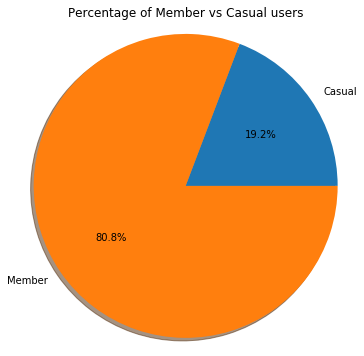

In [38]:
# pie chart of workers
labels = ['Casual', 'Member']
sizes = [joined_df['User Type'].value_counts()[1],
         joined_df['User Type'].value_counts()[0]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig, ax = plt.subplots(figsize = (6, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.set_title('Percentage of Member vs Casual users')
plt.show()

The pie plot indicates that the majority of the users of the Toronto Bike Share System are members. This is reasonable since member tend to use the system in a regular basis. A huge difference in percentage of member and casual users suggest us to compare the trip length of two types of users through density. Next, we will investigate the trip length of two types of users through summary statistics. 

In [39]:
member_df = joined_df[joined_df['User Type'] == 'Member']
casual_df = joined_df[joined_df['User Type'] == 'Casual']

###### Member Trip Length Summary

In [40]:
member_summary = member_df.describe().iloc[1:-1, [1, 3]]
member_summary = np.round(member_summary, decimals=1).drop('min')
display(member_summary)

,Duration (Seconds),Distance
mean,653.0,1686.0
std,344.3,994.7
25%,393.0,979.8
50%,585.0,1483.4
75%,849.0,2180.3


###### Casual Trip Length Summary

In [41]:
casual_summary = casual_df.describe().iloc[1:-1, [1, 3]]
casual_summary = np.round(casual_summary, decimals=1).drop('min')
display(casual_summary)

,Duration (Seconds),Distance
mean,1001.9,1851.9
std,423.8,1043.7
25%,667.0,1102.7
50%,976.0,1675.0
75%,1321.0,2407.7


Comparing the statistical summary of trip length of two types of users, we see that the statistical summary for "Distance" is similar between the two types of users. However, casual users have a significantly higher mean, quantiles, and standard deviation of duration than members. Noticed that the mean and the medium of duration of the casual users are above 600 seconds, which is unexpected according to the Bikeshare Toronto pricing scheme. One possible explanation to this phenomenon is that casual users might be using the system mainly for sightseeing, while members use the system as transportation. 

##### Member

<Figure size 1440x1440 with 0 Axes>

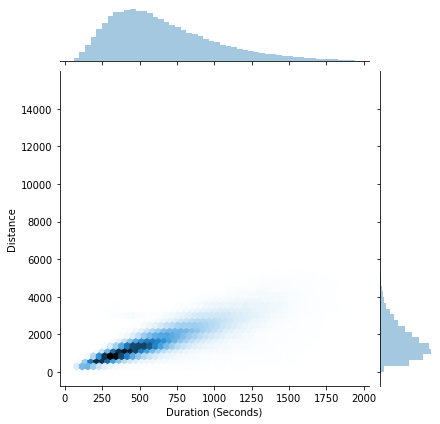

In [42]:
member_y = member_df['Duration (Seconds)']
member_x = member_df['Distance']

# Regression plot using seaborn.
fig = plt.figure(figsize=(20, 20))
#sns.regplot(x = member_x,y = member_y, color='blue', marker='+')
fig = sns.jointplot(x='Duration (Seconds)', y='Distance', data=member_df, kind='hex')

##### Casual User

<Figure size 1440x1440 with 0 Axes>

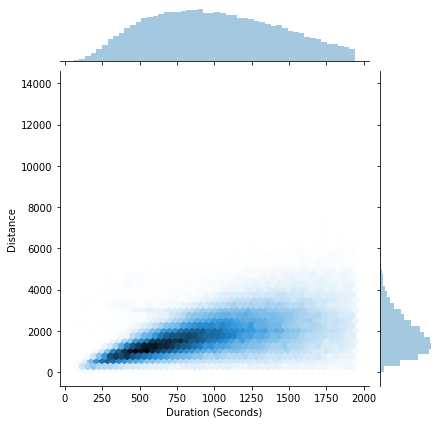

In [43]:
casual_y = casual_df['Duration (Seconds)']
casual_x = casual_df['Distance']

import seaborn as sns

# Regression plot using seaborn.
fig = plt.figure(figsize=(20, 20))
#sns.regplot(x = member_x,y = member_y, color='blue', marker='+')
fig = sns.jointplot(x='Duration (Seconds)', y='Distance', data=casual_df, kind='hex')

We have a joint histogram using hexagonal bins. The darker color bin indicates that there is a higher density at the point. The plot indicates a significant difference in duration between the users. Casual users reach their destinations significantly slower than members and the spread of duration is significantly higher than member. However, in terms of distance, the two cateogry of users have a similar behaviour. This suggests that there is a possibility that member is generally faster in biking compare to casual users. We will investigate this phenomenon further when answering the next question: Is there a relationship between the two definitions of trip length?

From the above plot, we came to a conclusion that there is a siginificant difference in behaviour between the two categories of users in terms of trip length. Hence we will investigate if there is a relationship between the two definitions of trip length separately for two types of users. 

We will be constructing linear regression model to determine the relationship between the two definitions of trip length. Firstly, we will examine the relationship for members.

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
def linear_regression(x, y):
    '''
    Construct a linear regression for x, y and print R square and coefficient
    '''
    x = preprocessing.scale(np.array(x).reshape(-1, 1))
    y = preprocessing.scale(np.array(y).reshape(-1, 1))
    model = LinearRegression()
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)
    slope = model.coef_
    print('slope:', slope[0])

In [58]:
linear_regression(member_x, member_y)

coefficient of determination: 0.5499366189437283
slope: [0.74157712]


We have obtained a coefficient of determination of 0.55 between the two definitions of trip length for member, suggesting that there is a moderate relationship between trip duration and distance traveled. Since we have standardized the data, the slope of 0.744 does not truly reflects to change in distance over change in duration. However; a positive slope indicates that there is a positive relationship between the two definitions of trip length. We will now examine the relationship for casual users. 

In [59]:
linear_regression(casual_x, casual_y)

coefficient of determination: 0.21705702582748299
slope: [0.46589379]


We have obtained a coefficient of determination of 0.22 between the two definitions of trip length for casual, suggesting that there is a week relationship between trip duration and distance traveled. A positive slope indicates that there is a positive relationship between the two definitions of trip length. We can come to a conclusion that there is a positive relationship between the two definitions of trip length for member; however, there is no significant relationship between the two definitions of trip length for casual users. 

### 2. Does weather affect trip length?

The next research question I would like to investigate in is if weather affects trip length. We have given the historical weather data of Toronto. Let briefly discuss variables we will be exploring to define "weather":
- Max Temp °C: The highest temperature in degrees Celsius observed of the day.
- Min Temp °C: The lowest temperature in degrees Celsius observed of the day.
- Mean Temp °C: The mean temperature in degrees Celsius observed of the day.
- Total Rain mm: The total rainfall, or amount of all liquid precipitation in millimetres observed on the day.
- Total Snow cm: The total snowfall, or amount of frozen (solid) precipitation in centimetres observed on the day.
- Spd of Max Gust km/h: The speed in kilometres per hour (km/h) of the maximum wind gust during the day.

Note that I am not including total precipitation since theoretically, there should be a collinear relationship between total rain, total snow, and total precipitation.

We will first explore which of these variables have a significant effect on trip length. Note that we will explore this research question for 2 different user type separately, as explained in the previous section. 

#### Weather vs Trip duration

I aggregated the data by the user type and trip date and obtain the average trip duration of the day.

In [84]:
data_duration = joined_df.groupby(['Date', 'User Type'])['Duration (Seconds)'].mean()\
.to_frame().pivot_table(index='Date', columns='User Type').reset_index()
data_duration.columns = ['Date', 'Casual Duration', 'Member Duration']
data_duration = data_duration.merge(new_weather_df[['Date', 'Max Temp °C', 'Min Temp °C', 'Mean Temp °C', 
                                                    'Total Rain mm', 'Total Snow cm', 'Total Precip mm',
                                                    'Spd of Max Gust km/h']], on='Date', how='inner')

First we will determine which weather variables affects trip duration. We will contruct the correlation matrix to select the important weather variables.

In [49]:
features = ['Max Temp °C', 'Min Temp °C', 'Mean Temp °C', 'Total Precip mm', 
            'Total Rain mm', 'Total Snow cm','Spd of Max Gust km/h']
data_duration[features] = data_duration[features].astype(int)
data_duration['Member Duration'] = data_duration['Member Duration'].astype(int)

In [93]:
data_duration = data_duration.dropna()
corr = data_duration.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Casual Duration,Member Duration,Max Temp °C,Min Temp °C,Mean Temp °C,Total Rain mm,Total Snow cm,Total Precip mm,Spd of Max Gust km/h
Casual Duration,1,0.45,0.4,0.36,0.38,-0.16,-0.021,-0.17,-0.15
Member Duration,0.45,1,0.6,0.55,0.58,-0.1,0.074,-0.086,-0.1
Max Temp °C,0.4,0.6,1,0.96,0.99,0.058,-0.18,0.017,-0.14
Min Temp °C,0.36,0.55,0.96,1,0.99,0.1,-0.17,0.064,-0.17
Mean Temp °C,0.38,0.58,0.99,0.99,1,0.078,-0.18,0.038,-0.16
Total Rain mm,-0.16,-0.1,0.058,0.1,0.078,1,-0.0093,0.98,0.19
Total Snow cm,-0.021,0.074,-0.18,-0.17,-0.18,-0.0093,1,0.19,0.15
Total Precip mm,-0.17,-0.086,0.017,0.064,0.038,0.98,0.19,1,0.22
Spd of Max Gust km/h,-0.15,-0.1,-0.14,-0.17,-0.16,0.19,0.15,0.22,1


After reviewing the correlation matrix, I decided to select Max Temp °C and Total Precipitation mm to investigate further on if weather has an effect on trip length. Although Min Temp and Mean Temp has a higher correlation with Member Duration compare to Total Precipitation, the 3 variables are too correlated, hence investigating the question more deeply on all three variables would be meaningless. We will examine the relationship between the two variables chosen and trip duration deeply through scatterplot with x variable showing means and confidence intervals for unique values and the linear regression model. We will first look at members.

[Text(0.5, 1.0, 'Max Temperature vs Trip Duration for Member')]

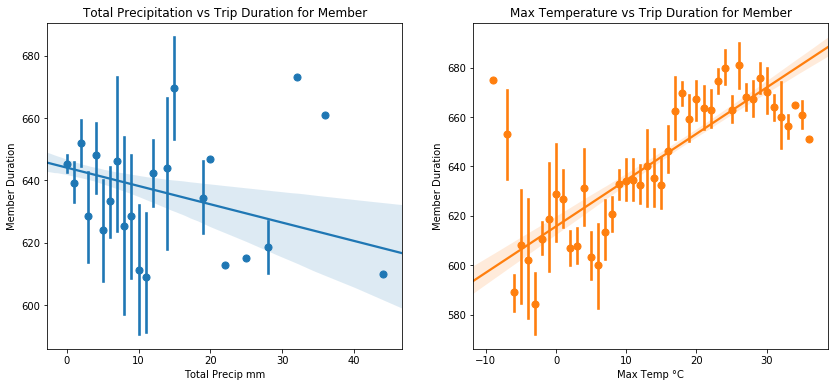

In [72]:
f, axes = plt.subplots(ncols=2, figsize=(14, 6))
sns.regplot(x="Total Precip mm", y="Member Duration", data=data_duration, x_estimator=np.mean, ax = axes[0])
axes[0].set(title = 'Total Precipitation vs Trip Duration for Member')
sns.regplot(x='Max Temp °C', y="Member Duration", data=data_duration, x_estimator=np.mean, ax = axes[1])
axes[1].set(title = 'Max Temperature vs Trip Duration for Member')

In [73]:
linear_regression(data_duration["Total Precip mm"], data_duration['Member Duration'])

coefficient of determination: 0.007464440951776008
slope: [-0.086397]


In [74]:
linear_regression(data_duration['Max Temp °C'], data_duration['Member Duration'])

coefficient of determination: 0.3569934975475517
slope: [0.59748933]


The scatter plots and the results of our model indicates that for member, there is no relationship between precipitation and trip duration (correlation coefficient of less than 0.01). However, there is a moderate and positive relationship between the maximum temperature of the day and trip duration (correlation coefficient is 0.36), indicating that members tend to use the system longer in time as the temperature goes up. 

Next we will examine the relationship between the two variables chosen and trip duration by casual users. 

[Text(0.5, 1.0, 'Max Temperature vs Trip Duration for Casual Users')]

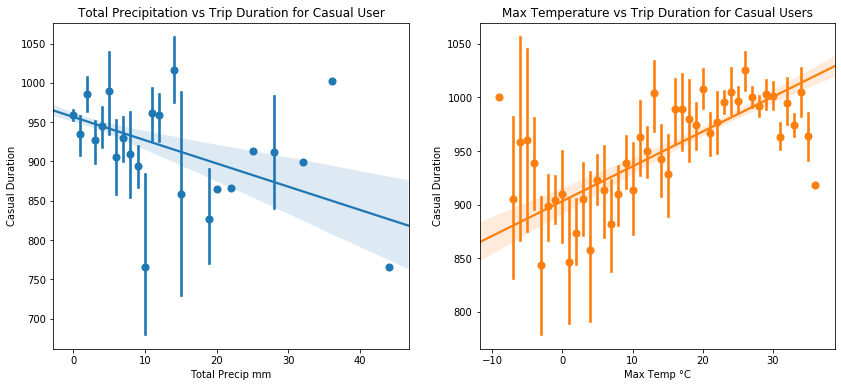

In [75]:
f, axes = plt.subplots(ncols=2, figsize=(14, 6))
sns.regplot(x="Total Precip mm", y="Casual Duration", data=data_duration, x_estimator=np.mean, ax = axes[0])
axes[0].set(title = 'Total Precipitation vs Trip Duration for Casual User')
sns.regplot(x='Max Temp °C', y="Casual Duration", data=data_duration, x_estimator=np.mean, ax = axes[1])
axes[1].set(title = 'Max Temperature vs Trip Duration for Casual Users')

In [76]:
linear_regression(data_duration["Total Precip mm"], data_duration['Casual Duration'])

coefficient of determination: 0.028505048144846556
slope: [-0.16883438]


In [77]:
linear_regression(data_duration['Max Temp °C'], data_duration['Casual Duration'].dropna())

coefficient of determination: 0.16067506344844973
slope: [0.40084294]


The scatter plots and the results of our model indicates that for casual users, there is no relationship between precipitation and trip duration. However, there is a weak relationship betweem maximum temperature and trip duration, as well as a postive relationship, but not as much as members, between the two variables. This suggests that casual users are more willing to use the system more as the temperature goes up.

Next we will examine the relationship between the weather and trip distance.

I will first aggregate the data by the user type and trip date and obtain the average trip distance of the day.

In [91]:
data_distance = joined_df.groupby(['Date', 'User Type'])['Distance'].mean()\
.to_frame().pivot_table(index='Date', columns='User Type').reset_index()
data_distance.columns = ['Date', 'Casual Distance', 'Member Distance']
data_distance = data_distance.merge(new_weather_df[['Date', 'Max Temp °C', 'Min Temp °C', 'Mean Temp °C', 
                                                    'Total Rain mm', 'Total Snow cm', 'Total Precip mm',
                                                    'Spd of Max Gust km/h']], on='Date', how='inner')

We will determine which weather variables affects trip distance. We will contruct the correlation matrix to select the weather variables we are interested in.

In [92]:
data_distance[features] = data_distance[features].astype(int)
data_distance['Member Distance'] = data_distance['Member Distance'].astype(int)

In [94]:
data_distance = data_distance.dropna()
corr = data_distance.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Casual Distance,Member Distance,Max Temp °C,Min Temp °C,Mean Temp °C,Total Rain mm,Total Snow cm,Total Precip mm,Spd of Max Gust km/h
Casual Distance,1,0.14,0.07,0.046,0.061,-0.082,0.11,-0.058,-0.035
Member Distance,0.14,1,0.62,0.6,0.61,-0.051,-0.27,-0.1,-0.18
Max Temp °C,0.07,0.62,1,0.96,0.99,0.058,-0.18,0.017,-0.14
Min Temp °C,0.046,0.6,0.96,1,0.99,0.1,-0.17,0.064,-0.17
Mean Temp °C,0.061,0.61,0.99,0.99,1,0.078,-0.18,0.038,-0.16
Total Rain mm,-0.082,-0.051,0.058,0.1,0.078,1,-0.0093,0.98,0.19
Total Snow cm,0.11,-0.27,-0.18,-0.17,-0.18,-0.0093,1,0.19,0.15
Total Precip mm,-0.058,-0.1,0.017,0.064,0.038,0.98,0.19,1,0.22
Spd of Max Gust km/h,-0.035,-0.18,-0.14,-0.17,-0.16,0.19,0.15,0.22,1


After reviewing the correlation matrix, I decided to select Max Temp °C and Total Snow cm to investigate further on if weather has an effect on trip length. We will examine the relationship between the two variables chosen and trip duration through the indentical method above.

[Text(0.5, 1.0, 'Max Temperature vs Trip Distance for Member')]

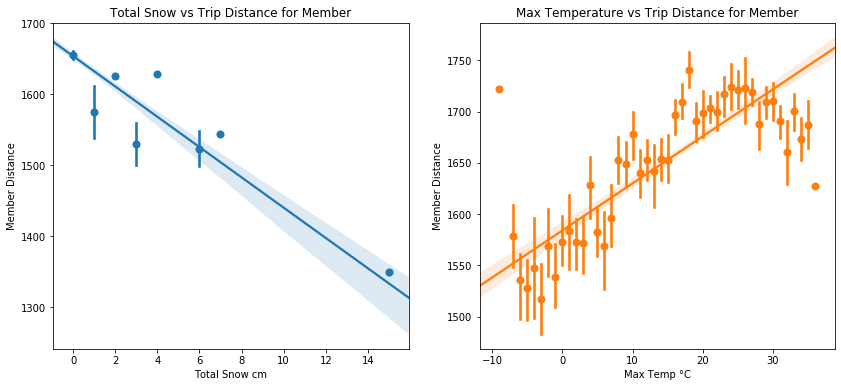

In [101]:
f, axes = plt.subplots(ncols=2, figsize=(14, 6))
sns.regplot(x="Total Snow cm", y="Member Distance", data=data_distance, x_estimator=np.mean, ax = axes[0])
axes[0].set(title = 'Total Snow vs Trip Distance for Member')
sns.regplot(x='Max Temp °C', y="Member Distance", data=data_distance, x_estimator=np.mean, ax = axes[1])
axes[1].set(title = 'Max Temperature vs Trip Distance for Member')

In [99]:
linear_regression(data_distance["Total Snow cm"], data_distance['Member Distance'])

coefficient of determination: 0.07132269455322493
slope: [-0.26706309]


In [102]:
linear_regression(data_distance["Max Temp °C"], data_distance['Member Distance'])

coefficient of determination: 0.3801634298847095
slope: [0.61657395]


The scatter plots and the results of our model indicates that for member, there is a weak relationship between total snow and trip duration (correlation coefficient of 0.07) and a negative relationship. This suggests that members tend to travel in shorter distance as there are more snow. Moreoever, there is a moderate and positive relationship between the maximum temperature of the day and trip distance (correlation coefficient is 0.38), indicating that members tend to travel farther as the temperature goes up.

Next we will examine the relationship between the two variables chosen and trip distance by casual users. 

[Text(0.5, 1.0, 'Max Temperature vs Trip Distance for Casual users')]

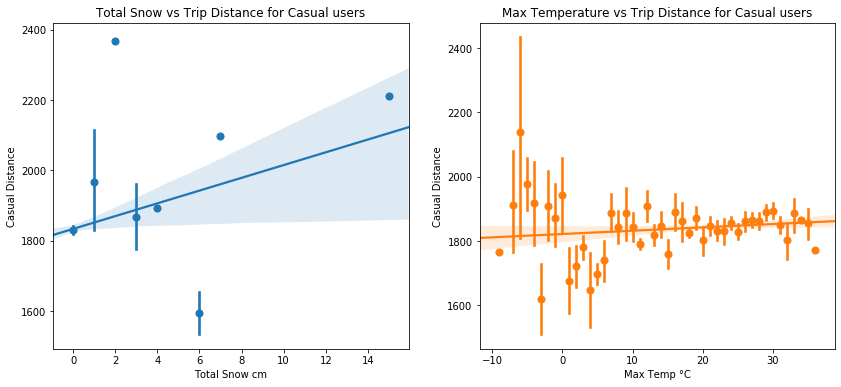

In [108]:
f, axes = plt.subplots(ncols=2, figsize=(14, 6))
sns.regplot(x="Total Snow cm", y="Casual Distance", data=data_distance, x_estimator=np.mean, ax = axes[0])
axes[0].set(title = 'Total Snow vs Trip Distance for Casual users')
sns.regplot(x='Max Temp °C', y="Casual Distance", data=data_distance, x_estimator=np.mean, ax = axes[1])
axes[1].set(title = 'Max Temperature vs Trip Distance for Casual users')

In [105]:
linear_regression(data_distance["Total Snow cm"], data_distance['Casual Distance'])

coefficient of determination: 0.012981024455012147
slope: [0.1139343]


In [106]:
linear_regression(data_distance["Max Temp °C"], data_distance['Casual Distance'])

coefficient of determination: 0.004833140255324664
slope: [0.06952079]


The scatter plots and the results of our model indicates that for casual users, there is no relationship between total snow and trip duration (correlation coefficient of 0.013) and there is a no relationship between maximum temperature and trip distance as well (correlation coefficient of 0.005) since the coefficient of determination is too low in both cases. 

<br/> <br/>

***

##  II.Conclusion / Discussion

To summarize our findings, we defined trip length in two way: trip duration and trip distance. We found that there is a significant difference in trip duration between the users, that is, casual users reach their destinations significantly slower than members. However, in terms of distance, the two cateogry of users have a similar behaviour. explanation to this phenomenon is that casual users might be using the system mainly for sightseeing, while members use the system as transportation. The other question we are interested if weather affects trip length of the Bike Share Toronto users. We found that temperature generally has a moderate relationship with both trip duration and trip distance for members. For casual users, maximum temperature has an weak positve effect on trip duration, but not on trip distance. Total snow has an effect on trip distance for members as well. Steps such as obtaining hourly weather data and look at trip length on hourly time series have the potential to improve upon on results in the future. 

In the end of this analysis, I would like to recognize some of the limitations in this study. The first limitation I would like to mention is that, for Bike Share Toronto Ridership data, there are inconsistent station names. We have tried to use fuzzywuzzy to deal with this issue; however, there are still some station names that cannot be matched. Another limitation I would like to mention is when calculating distance of each trip. We used Vincenty's formulae to calculate the distance; however, it does not reflect to the true distance traveled of the users, but rather just a distance between starting point and the ending point.

It could be worthwhile to further dive into the behavioural aspects of the Bike Share program. For example, investigating the stations that will increase the usage of the system, and linking more stations to popular sightseeing places in Toronto. 